# 데이터 과학 (15주차) 6월13일
> 함수형모델 공부

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [함수형모댈]

### 강의영상

> youtube: https://youtube.com/playlist?list=PLQqh36zP38-zHWBdwMLc0v7XeGagFoIqB

### 함수형모델 

네트워크 오브젝트를 만들지 않고 레이어를 설계한 다음 인풋 오브젝트를 만들고 아웃풋 오브젝트를 만든다.

`-` Imports

In [2]:
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp
import matplotlib.pyplot as plt 

In [3]:
tnp.experimental_enable_numpy_behavior()

`-` data

In [4]:
x= tnp.linspace(0,1,100).reshape(100,1)
y= x + tf.random.normal([100,1])*0.1

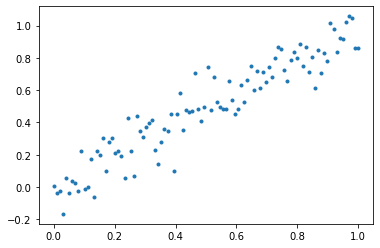

In [6]:
plt.plot(x,y,'.')

`-` input layer

In [7]:
tf.keras.layers.Input?

Signature:
tf.keras.layers.Input(
    shape=None,
    batch_size=None,
    name=None,
    dtype=None,
    sparse=None,
    tensor=None,
    ragged=None,
    type_spec=None,
    **kwargs,
)
Docstring:
`Input()` is used to instantiate a Keras tensor.

A Keras tensor is a symbolic tensor-like object,
which we augment with certain attributes that allow us to build a Keras model
just by knowing the inputs and outputs of the model.

For instance, if `a`, `b` and `c` are Keras tensors,
it becomes possible to do:
`model = Model(input=[a, b], output=c)`

Args:
    shape: A shape tuple (integers), not including the batch size.
        For instance, `shape=(32,)` indicates that the expected input
        will be batches of 32-dimensional vectors. Elements of this tuple
        can be None; 'None' elements represent dimensions where the shape is
        not known.
    batch_size: optional static batch size (integer).
    name: An optional name string for the layer.
        Should be unique in a mo

In [8]:
x0= tf.keras.layers.Input(shape=(1,))

In [9]:
x.shape

TensorShape([100, 1])

길이가 1일 튜플을 넣자

`-` 아키텍처

In [10]:
l1=tf.keras.layers.Dense(30)
a1=tf.keras.layers.Activation(tf.nn.relu)

In [11]:
x1=a1(l1(x0))

In [12]:
l2=tf.keras.layers.Dense(30)
a2=tf.keras.layers.Activation(tf.nn.relu)

In [13]:
x2=a2(l2(x1))

In [14]:
l3=tf.keras.layers.Dense(1)
x3=l3(x2) # output

`-` input, output 으로 모델(net)설정

In [16]:
tf.keras.Model?

Init signature: tf.keras.Model(*args, **kwargs)
Docstring:     
`Model` groups layers into an object with training and inference features.

Args:
    inputs: The input(s) of the model: a `keras.Input` object or list of
        `keras.Input` objects.
    outputs: The output(s) of the model. See Functional API example below.
    name: String, the name of the model.

There are two ways to instantiate a `Model`:

1 - With the "Functional API", where you start from `Input`,
you chain layer calls to specify the model's forward pass,
and finally you create your model from inputs and outputs:

```python
import tensorflow as tf

inputs = tf.keras.Input(shape=(3,))
x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
outputs = tf.keras.layers.Dense(5, activation=tf.nn.softmax)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
```

Note: Only dicts, lists, and tuples of input tensors are supported. Nested
inputs are not supported (e.g. lists of list or dicts of dict).

A new Functi

In [15]:
net = tf.keras.Model(inputs=x0, outputs=x3)

In [17]:
net.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 30)                60        
                                                                 
 activation (Activation)     (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 activation_1 (Activation)   (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,021
Trainable params: 1,021
Non-trainable par

`-` compile and fit

In [18]:
net.compile(loss='mse', optimizer='sgd')

In [21]:
net.fit(x,y,epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0168
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0162
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0161
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0160
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0155
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0153
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0151
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

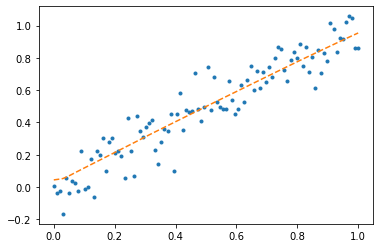

In [22]:
plt.plot(x,y,'.')
plt.plot(x,net(x),'--')